Most of the contents of this notebook were prepared by Dr. Edward Raff (Spring 2019)

## LINEAR REGRESSION

In [43]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from sklearn import datasets
from sklearn.linear_model import LinearRegression

First, lets remember linear regression. The goal is to learn a set of weights $\theta$ to predict a value $y$, based on a datapoint $x$. If $x$ has $d$ features, this looks like:

$$ {h_\theta}(x) = \theta_1 \cdot x_1 + \theta_2 \cdot x_2 + \ldots + \theta_{d-1} \cdot x_{d-1} + \theta_d \cdot x_d$$

Written with more math-like notation, that becomes

$${h_\theta}(x) = \sum_{i=1}^d \theta_i \cdot x_i = \theta^T x$$


To learn these weights $\theta$ we use our training data. We have $m$ datapoints, $x^{(1)}, x^{(2)}, \ldots, x^{(m)}$ and associated labels $y^{(1)}, y^{(2)}, \ldots, y^{(m)}$. 

We will use what is called a ***cost function*** or an ***objective function***. It is a function that describes a score we want to minimize in order to achieve our goal. For linear regression, our cost function is parameterized with $\theta$.

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left(\underbrace{\theta^T x^{(i)}}_{\text{Prediction}} - \underbrace{y^{(i)}}_{\text{Target}}\right)^2$$

Optimization is done using a gradient, so we a need a gradient:

$$\nabla_\theta J = \frac{1}{m} \sum_{i=1}^n x^{(i)} \cdot \underbrace{( \theta^T x^{(i)}-y^{(i)})}_{\text{The error}}$$

Lets look at some naive code for this. 

Assume there is only one variable ($\theta_1$), there is not even bias(intercept) term ($\theta_0$).

Notation: w is used instead of $\theta_1$, @ stands for dot product, X denotes data points ($x^{(1)}, x^{(2)}, \ldots, x^{(m)}$), and y denotes  labels ($y^{(1)}, y^{(2)}, \ldots, y^{(m)}$).

In [44]:
def _gradient_step(w, error, rate = 0.3):
    update = error * rate
    return w - update
  
def linear_regression(X,y):
  def objective_func(w):
    return np.sum((X @ w - y) * (X @ w - y))/(2*len(y))
  def gradient(w):
    return np.sum([X[i] * (X[i]*w - y[i]) for i in range(y.shape[0])])/len(y)

  #Lets pick some starting value for our weight vector. 
  w = np.zeros(X.shape[1])
  
  for i in range(30):
    w = _gradient_step(w, gradient(w))
    print(w,objective_func(w))
  return w  
  

We will use make_regression() function to make a toy regression problem. [See documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html )

<class 'tuple'>


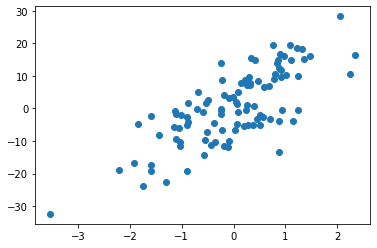

In [45]:
# Line below generates a random regression problem (no_of_samples, no_of_features ..)
data = datasets.make_regression(100,1,noise = 7)
print(type(data))
#display(data)
pyplot.plot(data[0][:], data[1][:], marker="o", linestyle='')
#a=data[0]
#b=data[1]
#print(type(a), type(b))
#print(a.shape, b.shape)
#help(pyplot.plot)

In [46]:
w = linear_regression(data[0], data[1])
# remember, what it prints are w(theta_1) and current value of objective_func

[2.4984331] 43.68777112525839
[4.25198868] 34.96584910472039
[5.48274295] 30.66933911913533
[6.34656277] 28.552833375015698
[6.95284519] 27.510220514829044
[7.37837186] 26.99661851811972
[7.67703292] 26.743612804209203
[7.88665181] 26.61897954405543
[8.03377537] 26.557583896911854
[8.13703583] 26.527339759163024
[8.20951043] 26.512441180668812
[8.26037761] 26.50510198511988
[8.29607936] 26.501486620652273
[8.32113707] 26.49970565431252
[8.33872412] 26.498828331671394
[8.35106781] 26.4983961533649
[8.35973137] 26.49818325781218
[8.365812] 26.49807838323683
[8.37007977] 26.498026720924415
[8.37307515] 26.498001271529134
[8.37517749] 26.497988734890907
[8.37665305] 26.49798255921183
[8.37768869] 26.49797951700775
[8.37841556] 26.497978018386203
[8.37892573] 26.497977280149566
[8.37928379] 26.49797691648648
[8.37953511] 26.497976737342242
[8.37971149] 26.497976649093903
[8.37983529] 26.49797660562185
[8.37992218] 26.497976584207073


## Solving linear regression with Scikit-learn.
The toy implementation above is just for demonstration, and doesn't have all the features we would want when doing some real machine learning. 
Below we will use Scikit-learn's implementation.

First lets put the data into a *dataframe*. We do not have to, but sometimes it makes things easier.

In [47]:
df=pd.DataFrame(data=np.c_[data[0],data[1]], columns=['X','Y'])
#np.c_[a,b] is the same with np.column_stack((a,b))
#similarly there is also np.r_[a,b] for row stack
display(df)

,X,Y
0,-0.176745,3.999583
1,0.145623,7.964265
2,0.057362,1.431083
3,0.929108,-0.418603
4,-0.239387,-1.692068
...,...,...
95,0.088150,-1.133262
96,-3.534542,-32.423740
97,-1.597601,-17.330779
98,2.239378,10.491578


In [48]:
df.head()

,X,Y
0,-0.176745,3.999583
1,0.145623,7.964265
2,0.057362,1.431083
3,0.929108,-0.418603
4,-0.239387,-1.692068


In [49]:
X = df['X'].values.reshape(-1, 1) 
#X = df['X'].values
Y = df['Y'].values.reshape(-1, 1)
print(X.shape)
print(Y.shape)
#help(df.values.reshape)

(100, 1)
(100, 1)


Now we are ready to call the built-in function for linear regression.

In [50]:
lr = LinearRegression()
lr.fit(X,Y)
#help(lr)

#A note on normalization
#In LinearRegression() default value for 'normalize' parameter is True.
#I.e. X will be normalized before regression by subtracting the mean and dividing by the l2-norm

LinearRegression()

In [51]:
lr.coef_, lr.intercept_

(array([[8.38475803]]), array([0.62980395]))

This new version has so-called ***intercept*** ($\theta_0$ in lecture notes).

$$h_{\theta}(x) = \theta_0 + \theta_1 x_1$$

So this solution corresponds to the line  y = lr.intercept_ + x*lr.coef_

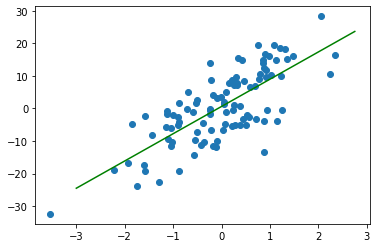

In [52]:
f = lambda x: lr.coef_[0] * x + lr.intercept_
steps = list(np.arange(-3,3,.25))
fitline = list(map(f, steps))
pyplot.plot(steps, fitline, color='green')
pyplot.scatter(x=df.X,y=df.Y)

With the intercept term, our fit line does not have to pass through (0,0) point anymore. Why it is important? Lets modify our data points by moving them up:

In [53]:
df["Y"] += 40

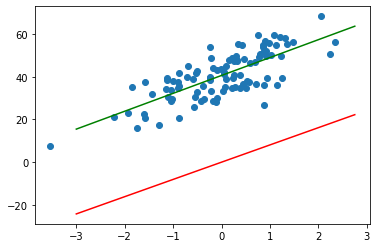

In [54]:
lr_a = LinearRegression(fit_intercept=False)
lr_a.fit(df['X'].values.reshape(-1, 1),df['Y'])

lr_b = LinearRegression(fit_intercept=True)
lr_b.fit(df['X'].values.reshape(-1, 1),df['Y'])

f = lambda x: lr_a.coef_[0] * x + lr_a.intercept_
steps = list(np.arange(-3,3,.25))
pyplot.plot(steps, list(map(f, steps)),color='red')

f = lambda x: lr_b.coef_[0] * x + lr_b.intercept_
steps = list(np.arange(-3,3,.25))
pyplot.plot(steps, list(map(f, steps)),color='green')

pyplot.scatter(x=df.X,y=df.Y)

## BOSTON dataset

In [55]:
data = datasets.load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [56]:
data

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [57]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [58]:
housing_df = pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'])

In [59]:
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [60]:
housing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


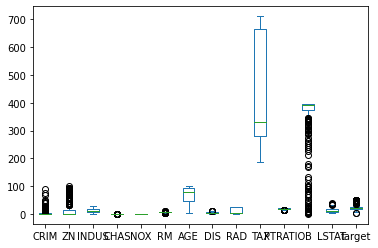

In [61]:
housing_df.plot.box()

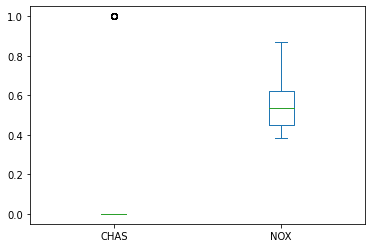

In [62]:
housing_df[['CHAS','NOX']].plot.box()

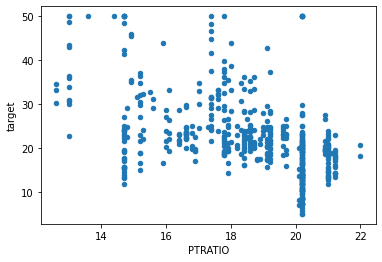

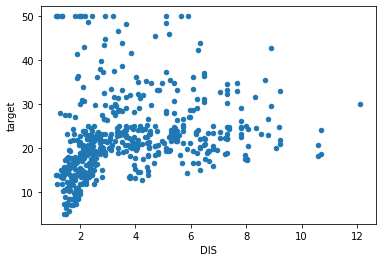

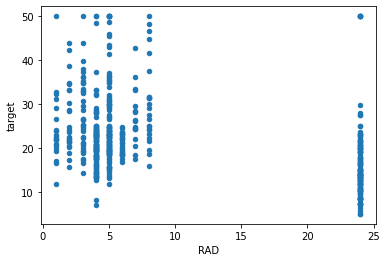

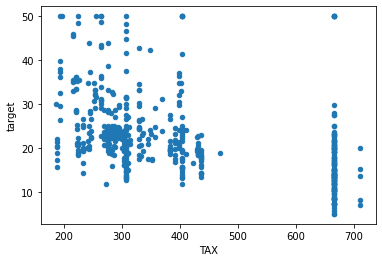

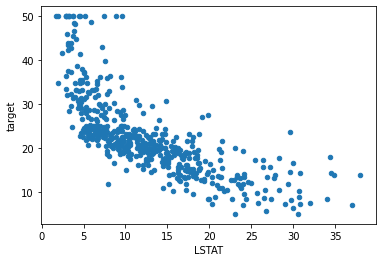

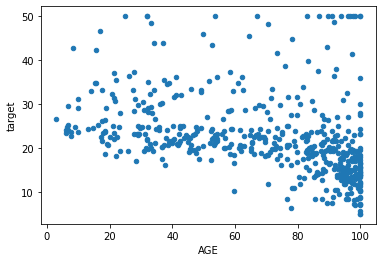

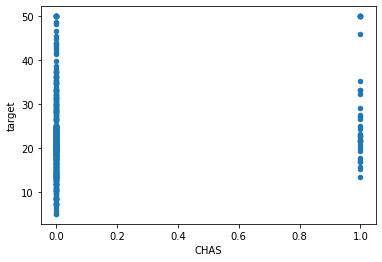

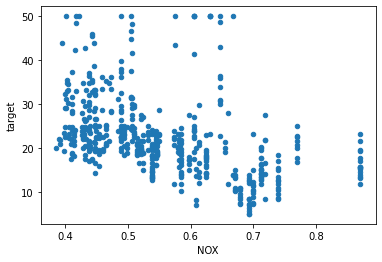

In [63]:
housing_df.plot.scatter(x='PTRATIO',y='target')   #pupil-teacher ratio by town
housing_df.plot.scatter(x='DIS',y='target')  #weighted distances to five Boston employment centres
housing_df.plot.scatter(x='RAD',y='target')  #index of accessibility to radial highways
housing_df.plot.scatter(x='TAX',y='target')  #full-value property-tax rate per $10,000
housing_df.plot.scatter(x='LSTAT',y='target')  #% lower status of the population
housing_df.plot.scatter(x='AGE',y='target')   #proportion of owner-occupied units built prior to 1940
housing_df.plot.scatter(x='CHAS',y='target')  #Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
housing_df.plot.scatter(x='NOX',y='target')  #nitric oxides concentration (parts per 10 million)

In [64]:
lr = LinearRegression()
X=housing_df[['CRIM',	'ZN',	'INDUS',	'CHAS',	'NOX',	'RM',	'AGE',	'DIS',	'RAD',	'TAX',	'PTRATIO',	'B',	'LSTAT']]
y=housing_df['target']

In [65]:
lr.fit(X,y)
#help(lr)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


LinearRegression()

In [66]:
print(lr.predict([X.iloc[501]])*1000)
#print((np.dot(lr.coef_,X.iloc[501])+lr.intercept_)*1000)
print(y.iloc[501]*1000)

[23533.34054667]
22400.0


In [67]:
print(lr.score(X,y))
help(lr.score)

0.7406426641094095
Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Return the coefficient of determination of the prediction.
    
    The coefficient of determination :math:`R^2` is defined as
    :math:`(1 - \frac{u}{v})`, where :math:`u` is the residual
    sum of squares ``((y_true - y_pred)** 2).sum()`` and :math:`v`
    is the total sum of squares ``((y_true - y_true.mean()) ** 2).sum()``.
    The best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always predicts
    the expected value of `y`, disregarding the input features, would get
    a :math:`R^2` score of 0.0.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Test samples. For some estimators this may be a precomputed
        kernel matrix or a list of generic objects instead with shape
        ``(n_samples, n_sam

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


In [68]:
print(lr.coef_)
print(lr.intercept_)

[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
36.459488385090125


# Homework #1   Due date: 18 June 2022, 11:59 PM

## Q1) One feature regression for Boston data. 
Choose one of the features in Boston data, try to select one that is mostly correlated (or inversely correlated) with the target. Fit a line with linear Regression. What is the equation of the fitting line? Please plot your data points (chosen feature vs. target) and plot your fitting line on it.

## Q2) Another metric for performance evaluation
We have seen that LinearRegression() by *sklearn* provides a method called *score* which outputs a value with a maximum of 1 (the larger the better), which is good to evaluate the performance. 
Another common performance metric is mean sum of squared error (MSSE):

$$\frac{1}{m} \sum_{i=1}^m \left(\underbrace{\theta^T x^{(i)}}_{\text{Prediction}} - \underbrace{y^{(i)}}_{\text{Target}}\right)^2$$

Please implement this metric and compute it when Boston data with all features are used. lr.score gave 0.74. What is the MSSE?

Important restriction: Do NOT use *mean_squared_error* module from *sklearn.metrics*.



# **Q1** Linear Regression with only one Feature

In [69]:
#Correlation matrix

housing_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [70]:
#From correlation matrix it is evident that 'LSTAT' is strongly inversely correlated to Target

X1=housing_df[['LSTAT']]
y1=housing_df['target']

In [71]:
#Splitting the data into Train and Test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X1,y1, test_size=0.20, random_state=42)  #using 20% of data for testing the model

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 1)
(102, 1)
(404,)
(102,)


In [72]:
# Building a Linear Regression Model

LR= LinearRegression()

LR.fit(X_train,y_train)
y_pred= LR.predict(X_test)
print(y_pred)


[26.09951047 31.42509574 17.37173642 29.50169924 18.14496114 23.26757492
 17.12043839 11.48556323 22.39769711 20.986562   17.51671606 18.3092714
 -0.90536293 22.90995849 23.48987703 23.5671995  17.84533656  5.2417736
 31.96635304 17.31374457 28.46751118 27.88759264 12.99335144 25.490596
 19.66241466 17.30407926 26.04151861 16.75315664 18.14496114 21.2088641
 20.63861087 27.87792733 21.8467745  24.98799993 14.23051099 19.57542688
 30.94183029 25.36494698 20.6676068  27.54930682 14.40448655 27.55897213
 32.05334082 22.18506031 26.32181257 18.29960609 17.10110777 28.34186216
 19.09216143 30.02362593 22.01108475 30.40057298 16.74349134 27.4236578
 31.78271217 24.61105288 18.80220216 31.61840192 25.53892254 16.99478937
 25.65490625 30.18793618 31.20279363 23.53820358 29.53069517 12.51975129
 18.28994078 28.34186216 30.66153632 16.46319737 21.16053756 27.35600064
 11.84317966 29.4533727  24.91067746  5.27076953 22.9196238  31.15446708
 14.46247841 11.6692041  26.34114319  9.32053401 25.89653

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


## *Equation of the linear regression line is Y= bX + a where X is the independent variable and Y is the dependent variable, the slope of the line is b with a as an intercept (the value of Y when X=0).*

In [73]:
#fitting a line with Linear Regression

print("slope of the line is",LR.coef_[0])
print("intercept of the line is",LR.intercept_,"\n")
print("Equation of the line:","y=", LR.coef_[0],"*x", "+", LR.intercept_)

slope of the line is -0.966530901950353
intercept of the line is 34.83694982031851 

Equation of the line: y= -0.966530901950353 *x + 34.83694982031851


Text(0, 0.5, 'Target')

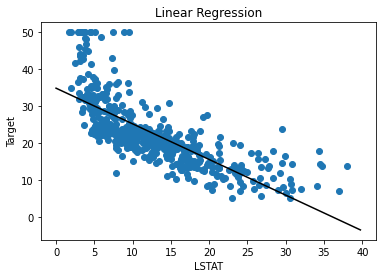

In [74]:
#Plotting the datapoints and the fitting line

pyplot.scatter(X1, y1, marker='o')
f = lambda x: LR.coef_[0] * x + LR.intercept_
steps = list(np.arange(0,40,.25))
pyplot.plot(steps, list(map(f, steps)),color='black')
pyplot.title("Linear Regression")
pyplot.xlabel('LSTAT')
pyplot.ylabel('Target')

In [75]:
#Model Evaluation using r2

from sklearn import metrics

print("Accuracy of the model is",(metrics.r2_score(y_test,y_pred))*100,"%")          # or print(LR.score(X_test,y_test))         

Accuracy of the model is 54.29180422970384 %


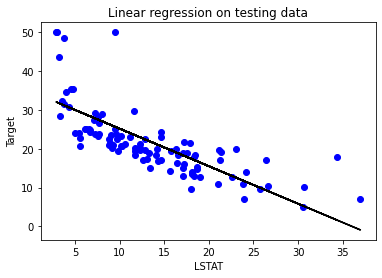

In [76]:
#plotting the data and fitting line on test data

pyplot.scatter(X_test, y_test, color ='b')
pyplot.plot(X_test, y_pred, color ='k')
pyplot.xlabel('LSTAT')
pyplot.ylabel('Target')
pyplot.title("Linear regression on testing data") 
pyplot.show()

# **Q2** Performace Evaluation Metric "MSSE"

In [77]:
# Metric for "performance evaluation" for boston data where we have used all the features to predict Target.

y_Prediction= lr.predict(X)

MSSE= np.sum((y-y_Prediction) *(y-y_Prediction))/(len(y))

print("The Mean sum of squared error is:",MSSE)


The Mean sum of squared error is: 21.894831181729202


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,
